<a href="https://colab.research.google.com/github/ale-camer/Data-Analysis/blob/Finance/Shop_Attendance_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is a simulation of random clients attending to a shop. Key statistics were calculated with the assumptions that: clients arrival has an exponential distribution, there is only one employee working and that the shop is open from 9am to 5pm (480 minutes). These statistics are:

- dService: The duration of the service provided to the client.
- dTotal: The total duration of the client in the shop since it's arrival until it's departure.
- dNoClients: The duration where no clients were in the shop.
- dQueue: The duration the customer was in the queue.

In order to custom the code to a particular business, the average service time (lambdA) and the average customer arrival time (mu) can be changed in the "constants" section at the begining of the code.

In [27]:
# packages
import numpy as np
import pandas as pd
from random import expovariate
import random
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# constants
random.seed(12345678) # set seed in order to run always the same simulation
lambdA = 3 # average service time
mu = 4 # average customer arrival time
time, occupied, queue, exits, clients = 0, False, 0, 9999, pd.DataFrame(columns=['tArrival','tExit','tService','dService'])
tArrival = expovariate(lambdA/60)
entry = time + tArrival
times, queues, contador, totalMinutes = [], [], 1, 480

# simulation
while time < totalMinutes:
    times.append(time), queues.append(queue) 
    if entry < exits:
        time, tArrival = entry, expovariate(lambdA/60)
        entry = time + tArrival
        client = {'tArrival':time,'tExit':np.nan,'tService':np.nan,'dService':np.nan}
        clients = clients.append(client,ignore_index=True)
        if occupied == True: # if a client is being served will go to the queue
            queue = queue + 1
        else:
            occupied, tService = True, expovariate(mu/60)
            exits = time + tService
            clients.loc[clients.index[-1],'tExit'] = exits # timestamp of exit
            clients.loc[clients.index[-1],'tService'] = time # timestamp of arrival
            clients.loc[clients.index[-1],'dService'] = tService # timestamp of service
    else: 
        time = exits
        if queue > 0: # if there is people in the queue
            queue, tService = queue - 1, expovariate(mu/60)
            exits = time + tService
            clients.loc[clients.index[-1] - queue,'tExit'] = exits
            clients.loc[clients.index[-1] - queue,'tService'] = time
            clients.loc[clients.index[-1] - queue,'dService'] = tService
        else:
            occupied, exits = False, 9999

clients[['hArrival','hService','hExit','dTotal','dNoClients','dQueue']], before = np.nan, 0
for i in range(clients.shape[0]):
        
    if int(str(clients.loc[i,"tArrival"]).split(".")[1][:2])-60 >= 0:
        sec1 = str(int(str(clients.loc[i,"tArrival"]).split(".")[1][:2])-60)
        if len(sec1) == 2:
            pass
        else:
            sec1 = '0'+sec1
    else:
        sec1 = str(clients.loc[i,"tArrival"]).split(".")[1][:2]
        
    if pd.isna(clients.loc[i,"tExit"]):
        pass
    else:
        if int(str(clients.loc[i,"tExit"]).split(".")[1][:2])-60 >= 0:
            sec2 = str(int(str(clients.loc[i,"tExit"]).split(".")[1][:2])-60)
            if len(sec2) == 2:
                pass
            else:
                sec2 = '0'+sec2
        else:
            sec2 = str(clients.loc[i,"tExit"]).split(".")[1][:2]
            
        if int(str(clients.loc[i,"tService"]).split(".")[1][:2])-60 >= 0:
            sec3 = str(int(str(clients.loc[i,"tService"]).split(".")[1][:2])-60)
            if len(sec3) == 2:
                pass
            else:
                sec3 = '0'+sec3
        else:
            sec3 = str(clients.loc[i,"tService"]).split(".")[1][:2]
    
        if len(str(int(clients.loc[i,"tArrival"])-(60*int(int(clients.loc[i,"tArrival"])/60)))) == 1:
            min1 = '0'+str(int(clients.loc[i,"tArrival"])-(60*int(int(clients.loc[i,"tArrival"])/60)))
        else:
            min1 = int(clients.loc[i,"tArrival"])-(60*int(int(clients.loc[i,"tArrival"])/60))
            
        if len(str(int(clients.loc[i,"tExit"])-(60*int(int(clients.loc[i,"tExit"])/60)))) == 1:
            min2 = '0'+str(int(clients.loc[i,"tExit"])-(60*int(int(clients.loc[i,"tExit"])/60)))
        else:
            min2 = int(clients.loc[i,"tExit"])-(60*int(int(clients.loc[i,"tExit"])/60))
            
        if len(str(int(clients.loc[i,"tService"])-(60*int(int(clients.loc[i,"tService"])/60)))) == 1:
            min3 = '0'+str(int(clients.loc[i,"tService"])-(60*int(int(clients.loc[i,"tService"])/60)))
        else:
            min3 = int(clients.loc[i,"tService"])-(60*int(int(clients.loc[i,"tService"])/60))            
          
        hArrival = str(f'{9 + int(clients.loc[i,"tArrival"]/60)}:{min1}:{sec1}')
        hService = str(f'{9 + int(clients.loc[i,"tService"]/60)}:{min3}:{sec3}')
        hExit = str(f'{9 + int(clients.loc[i,"tExit"]/60)}:{min2}:{sec2}')
        
        clients.loc[i,'hArrival'] = hArrival # hour of arrival
        clients.loc[i,'hService'] = hService # hour of service
        clients.loc[i,'hExit'] = hExit # hour of exit
        clients.loc[i,'dTotal'] = round(clients.loc[i,"tExit"] - clients.loc[i,"tArrival"],2) # total duration of the client in the shop
        clients.loc[i,'dNoClients'] = round(max([0,clients.loc[i,"tArrival"]-before]),2) # duration without clients
        clients.loc[i,'dQueue'] = round(clients.loc[i,"tService"] - clients.loc[i,"tArrival"],2) # duration in queue
        before = clients.loc[i,"tExit"]
pd.DataFrame(clients)

,tArrival,tExit,tService,dService,hArrival,hService,hExit,dTotal,dNoClients,dQueue
0,25.478405,29.374984,25.478405,3.896579,9:25:47,9:25:47,9:29:37,3.90,25.48,0.00
1,45.527963,59.501644,45.527963,13.973681,9:45:52,9:45:52,9:59:50,13.97,16.15,0.00
2,51.349605,95.793600,59.501644,36.291956,9:51:34,9:59:50,10:35:19,44.44,0.00,8.15
3,69.012776,96.150046,95.793600,0.356446,10:09:01,10:35:19,10:36:15,27.14,0.00,26.78
4,70.619419,144.621107,96.150046,48.471061,10:10:01,10:36:15,11:24:02,74.00,0.00,25.53
5,78.787855,171.978189,144.621107,27.357082,10:18:18,11:24:02,11:51:37,93.19,0.00,65.83
6,82.015436,175.800932,171.978189,3.822743,10:22:01,11:51:37,11:55:20,93.79,0.00,89.96
7,118.732035,187.485453,175.800932,11.684522,10:58:13,11:55:20,12:07:48,68.75,0.00,57.07
8,132.379714,199.421534,187.485453,11.936081,11:12:37,12:07:48,12:19:42,67.04,0.00,55.11
9,161.723046,203.848007,199.421534,4.426473,11:41:12,12:19:42,12:23:24,42.12,0.00,37.70


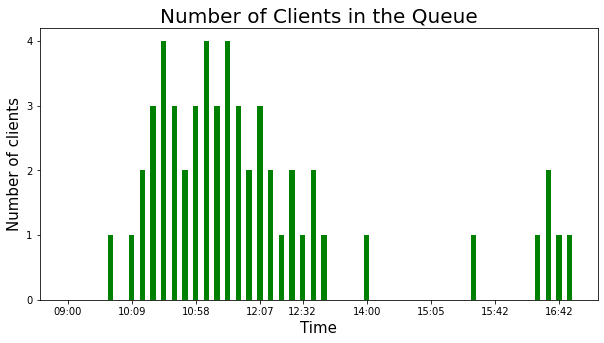

In [8]:
times2, ts1 = pd.date_range("9:00:00","17:00:00",freq="1min"), []
for i in range(len(times)): ts1.append(int(times[i]))
ts1 = pd.DataFrame(ts1)
ts1 = ts1.merge(pd.DataFrame(times2),left_on=0,right_index=True,how='left').rename(columns={
    '0_x':'integer','0_y':'date'})
ts1['minute'] = ts1['date'].apply(lambda a: a.strftime("%H:%M"))
indice = [i for i in ts1['minute'].index if i % 6 == 0]

plt.figure(figsize=(10,5))
plt.bar(ts1['minute'], queues, color='g', width = .5)
plt.yticks(np.arange(0,max(queues)+1,1))
plt.xticks(list(ts1['minute'][indice]))
plt.xlabel("Time",fontsize=15)
plt.ylabel("Number of clients",fontsize=15)
plt.title("Number of Clients in the Queue",fontsize=20)
plt.show()

This graph only tells us that most customers are expected to come in from 10 to 12:30 and before closing. Therefore, it is also likely that a bottleneck will be generated at these times.

Duration Statistics 

                           dService  dTotal  dNoClients  dQueue
Count                        25.00   25.00       25.00   25.00
Mean                         13.38   33.59        6.36   20.20
Standard Deviation           11.99   28.03       10.93   24.68
Minimum                       0.36    1.66        0.00    0.00
25th Percentile               3.90    8.10        0.00    0.00
Median                       10.10   29.92        0.00   12.76
75th Percentile              15.71   44.44        4.47   30.09
Maximum                      48.47   93.79       33.06   89.96
Coefficient of variation     89.55   83.44      171.91  122.17 




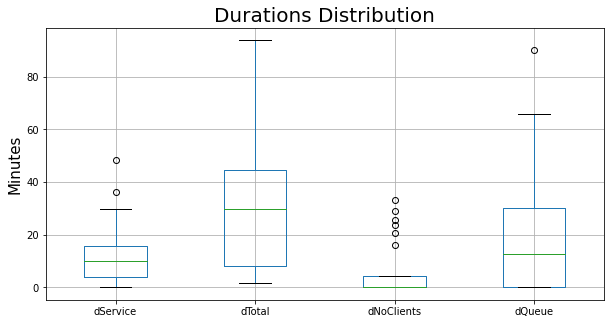

In [26]:
a = clients[['dService','dTotal','dNoClients','dQueue']].describe()
a = a.append(pd.DataFrame(a.loc['std',:] / abs(a.loc['mean',:])*100).T,ignore_index=False)
a.index = ['Count','Mean','Standard Deviation','Minimum','25th Percentile','Median','75th Percentile','Maximum','Coefficient of variation']
print('Duration Statistics \n\n',round(a,2),'\n\n')
clients[['dService','dTotal','dNoClients','dQueue']].boxplot(figsize=(10,5))
plt.ylabel('Minutes',fontsize=15)
plt.title('Durations Distribution',fontsize=20)
plt.show()    

The key points of this table and graph are:

- The expected time a client would spent being served, in the shop and in the queue are 13, 33 and 20 minutes respectively.
- The total time a client spent in the shop is the variable with less variation.
- Most of the time the employee is always working.

Correlations 

             dService  dTotal  dNoClients  dQueue
dService        1.00    0.48       -0.38    0.05
dTotal          0.48    1.00       -0.60    0.90
dNoClients     -0.38   -0.60        1.00   -0.50
dQueue          0.05    0.90       -0.50    1.00 




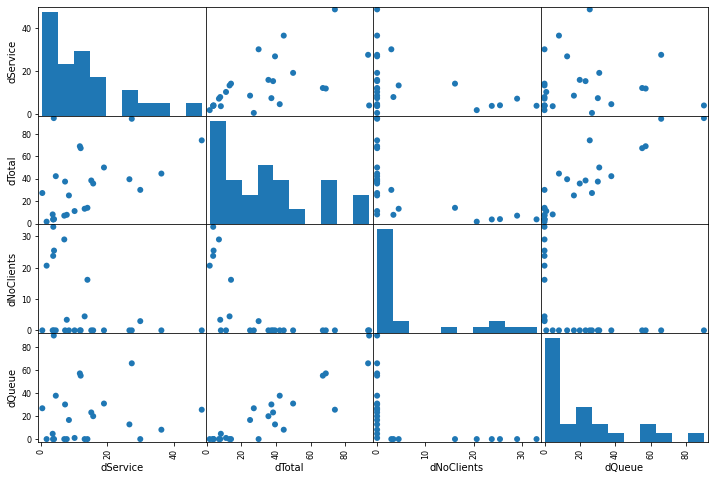

In [24]:
print('Correlations \n\n',round(clients[['dService','dTotal','dNoClients','dQueue']].corr(),2),'\n\n')
# print(clients[['dService','dTotal','dNoClients','dQueue']].corr())
scatter_matrix(clients[['dService','dTotal','dNoClients','dQueue']], figsize=(12, 8), alpha = 1, marker = 'o')
pass

The key point of this table and graph is that the total time spent in the shop and the time in the queue have a very high correlation, which suggest that most of the time spended is in the queue and that the employee is pretty consistent with hes work.
